# Scopt example

In [1]:
from modelgym.models import CtBClassifier, XGBClassifier, LGBMClassifier
from modelgym.utils import ModelSpace
from skopt.space import Integer, Categorical, Real
from sklearn.datasets import make_classification
from modelgym.utils import XYCDataset
from modelgym.trainers import SkoptTrainer
from modelgym.report import Report
from modelgym.metrics import Accuracy, RocAuc
import pandas as pd
import math

In [2]:
catboost_space = [
    Integer(low=100, high=101, name='iterations'),
    Integer(low=1, high=11, name='depth'),
    Real(low=math.exp(-5), high=1e-1, prior='log-uniform', name='learning_rate'),
    Real(low=0.01, high=1, prior='uniform', transform='identity', name='rsm'),
    Categorical(categories=('Newton', 'Gradient'), prior=None, name='leaf_estimation_method'),
    Integer(low=1, high=10, name='l2_leaf_reg'),
    Real(low=0, high=2, prior='uniform', transform='identity', name='bagging_temperature')
]
catboost_model = ModelSpace(CtBClassifier,
                   space=catboost_space,
                   space_update=False)

In [3]:
# to fix a parameter use Categorical with one category
xgboost_space = [
    # Categorical([0.01], name='learning_rate'), # fixed parameter
    Real(low=0.01, high=1.0, prior='log-uniform', name='learning_rate'),
    Integer(low=0, high=5, name='min_child_weight'),
    Integer(low=0, high=50, name='max_depth'),
    Integer(low=0, high=20, name='max_delta_step'),
    Real(low=0.01, high=1.0, prior='subsample', name='uniform'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bytree'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bylevel'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_lambda'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_alpha'),
    Real(low=1e-9, high=0.5, prior='log-uniform', name='gamma'),
    Integer(low=50, high=100, name='n_estimators'),
    Real(low=1e-6, high=500, prior='log-uniform', name='scale_pos_weight'),
]
xgboost_model = ModelSpace(XGBClassifier,
                   space=xgboost_space,
                   space_update=False)

In [4]:
models = [
    catboost_model,
    xgboost_model,
]

## Get dataset

Toy dataset

In [5]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
dataset = XYCDataset(X, y)

In [6]:
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
# dataset = pd.DataFrame(data=X)
# dataset['y'] = y
# dataset.head()

## Create a Skopt Trainer

In [7]:
trainer = SkoptTrainer(models)

## Optimize hyperparams

Of course, it will take some time.

In [8]:
%%time
trainer.crossval_optimize_params(Accuracy(), dataset, metrics=[Accuracy(), RocAuc()])

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


CPU times: user 12min 39s, sys: 6min 20s, total: 18min 59s
Wall time: 3min 11s


{'CtBClassifier': {'loss': -0.9699940582293524,
  'metric_cv_results': [{'accuracy': 0.9705882352941176, 'roc_auc': 1.0},
   {'accuracy': 0.9696969696969697, 'roc_auc': 0.9924812030075189},
   {'accuracy': 0.9696969696969697, 'roc_auc': 0.991304347826087}],
  'params': {'bagging_temperature': 0.23753523515128744,
   'depth': 1,
   'iterations': 101,
   'l2_leaf_reg': 1,
   'leaf_estimation_method': 'Gradient',
   'learning_rate': 0.09581076757901419,
   'rsm': 0.20323391526718262}},
 'XGBClassifier': {'loss': -0.9298871063576946,
  'metric_cv_results': [{'accuracy': 0.9411764705882353,
    'roc_auc': 0.9963369963369964},
   {'accuracy': 0.8787878787878788, 'roc_auc': 0.9849624060150376},
   {'accuracy': 0.9696969696969697, 'roc_auc': 0.9913043478260869}],
  'params': {'colsample_bylevel': 0.7134318144273675,
   'colsample_bytree': 0.5462746972869348,
   'gamma': 0.12652878691109318,
   'learning_rate': 0.07487046710780541,
   'max_delta_step': 10,
   'max_depth': 37,
   'min_child_weig

In [9]:
trainer.get_best_results()

{'CtBClassifier': {'model_space': <modelgym.utils.model_space.ModelSpace at 0x7fbd8c01a208>,
  'result': {'loss': -0.9699940582293524,
   'metric_cv_results': [{'accuracy': 0.9705882352941176, 'roc_auc': 1.0},
    {'accuracy': 0.9696969696969697, 'roc_auc': 0.9924812030075189},
    {'accuracy': 0.9696969696969697, 'roc_auc': 0.991304347826087}],
   'params': {'bagging_temperature': 0.23753523515128744,
    'depth': 1,
    'iterations': 101,
    'l2_leaf_reg': 1,
    'leaf_estimation_method': 'Gradient',
    'learning_rate': 0.09581076757901419,
    'rsm': 0.20323391526718262}}},
 'XGBClassifier': {'model_space': <modelgym.utils.model_space.ModelSpace at 0x7fbd8bfa8438>,
  'result': {'loss': -0.9298871063576946,
   'metric_cv_results': [{'accuracy': 0.9411764705882353,
     'roc_auc': 0.9963369963369964},
    {'accuracy': 0.8787878787878788, 'roc_auc': 0.9849624060150376},
    {'accuracy': 0.9696969696969697, 'roc_auc': 0.9913043478260869}],
   'params': {'colsample_bylevel': 0.71343181

## Report best results

In [10]:
reporter = Report(trainer.get_best_results(), dataset, [Accuracy(), RocAuc()])

### Report in text form

In [11]:
reporter.print_all_metric_results()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.969994 (+4.31%)
XGBClassifier  0.929887 (+0.00%)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.994595 (+0.38%)
XGBClassifier  0.990868 (+0.00%)


### Report plots


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



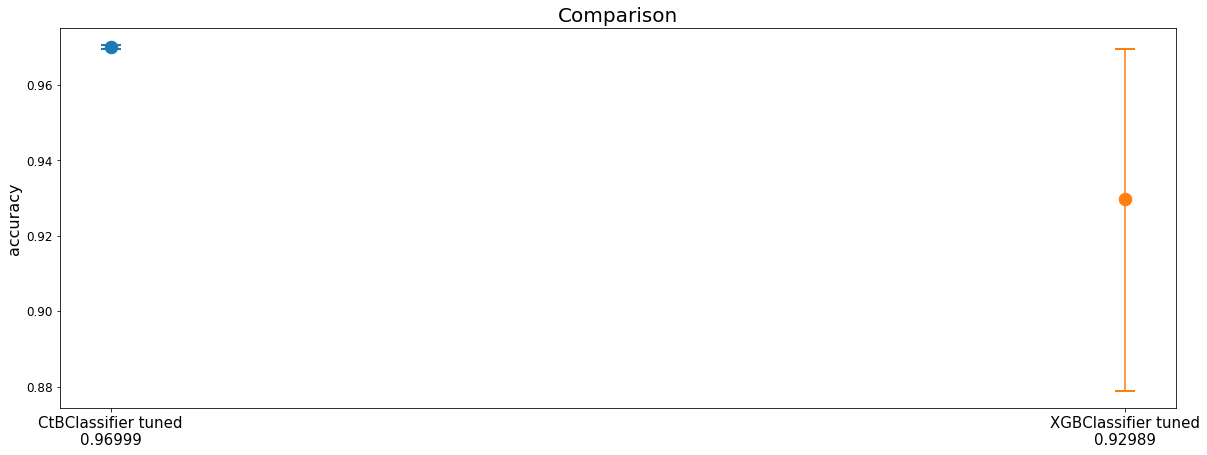


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



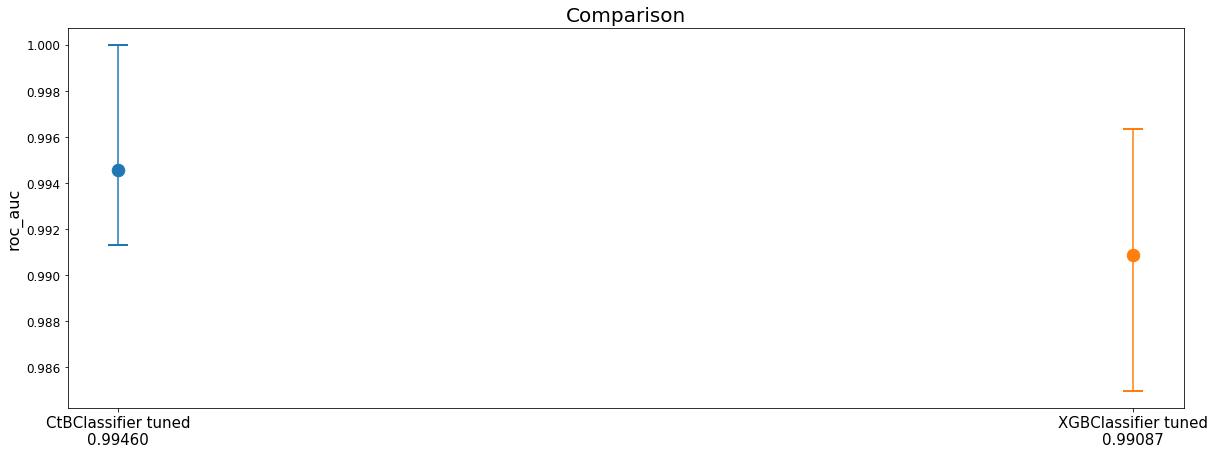

In [12]:
reporter.plot_all_metrics()

### Report heatmaps for each metric


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



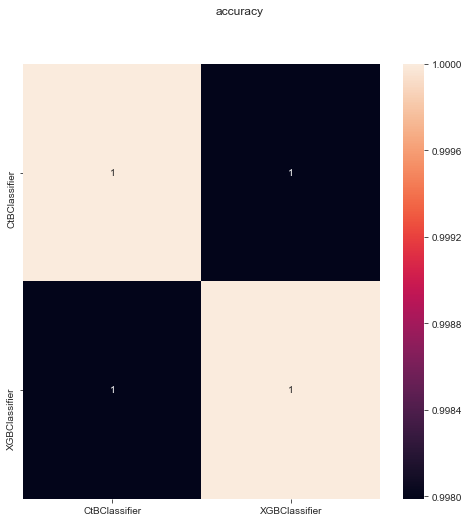


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



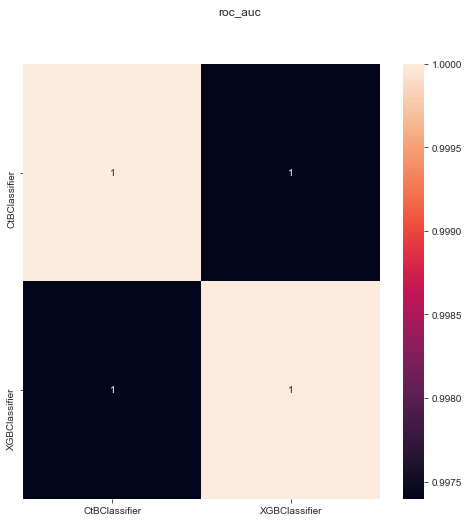

In [13]:
reporter.plot_heatmaps()

That's it! 

If you like it, please follow the advanced tutorial and learn all features modelgym can provide.